In [1]:
#Mains
import numpy as np
import pandas as pd
import re
import string
#Models
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
#Sklearn Helpers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_selection import chi2
#For plots
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)

C:\Users\turgu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
#dataset=pd.read_csv('offenseval-tr-training-v1.tsv', sep='\t')
dataset = pd.read_csv('data/troff-v1.0.tsv', sep='\t')
dataset.head()

id      timestamp  \
0  973568937593065472  1520952977415   
1  973568937723035648  1520952977446   
2  973568937911873536  1520952977491   
3  973568939925090304  1520952977971   
4  973568940667539457  1520952978148   

                                                                                                                                                                                                                                                                    text  \
0  @USER06095 HÄ±rsÄ±z demiÅŸken Tuncay sizin ÅŸu 1.200 bin TL'lik faturayÄ± naptÄ±nÄ±z malum MÄ°LLETE kitlesiniz ya, sizden Ã¢lÃ¢ HIRSIZ varmÄ± bu Ã¼lkede banka soyarken kÃ¢r MASKESÄ° Ã¼lke soyarken AtatÃ¼rk'Ã¼n MASKESÄ° Ã§oooooookk yÃ¼zsÃ¼nÃ¼z CHP OLARAK...                              
1  Ne bileyim sen hastayÄ±m deyince bende veteriner okumaya karar verdim                                                                                                                                                                                                    
2  AkÅŸam eve gittiÄŸimizde yorgunluÄŸuma iyi gelecek bi bayan olmalÄ± evde                                                                                                                                                                                                    
3  Kookâ€™un sesini 18381 kez dinledikten sonra eÄŸer devam edersem aÄŸlamaktan gÃ¶zÃ¼m ÅŸiÅŸer annem aÄŸzÄ±ma sÄ±Ã§ar hangsang dinleyip enerji toplÄ±yÄ±m                                                                                                                               
4  @USER05270 @USER04816 o macta adam 6 7 tane net sut cikartti aksini soleyen ya maldir yada futboldan anlamiyodur buna benzer bir pozisyon da wesley uzaktan attigi golun birinde de ayni pozisyon vardi ozaman bunu size en iyi volkan aciklar kudurun fesat ibneler.   

  label  
0  grp   
1  ind   
2  grp   
3  prof  
4  grp

In [3]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'].head()

0    @user06095 hÄ±rsÄ±z demiÅŸken tuncay sizin ÅŸu 1.200 bin tl'lik faturayÄ± naptÄ±nÄ±z malum miÌ‡llete kitlesiniz ya, sizden Ã¢lÃ¢ hirsiz varmÄ± bu Ã¼lkede banka soyarken kÃ¢r maskesiÌ‡ Ã¼lke soyarken atatÃ¼rk'Ã¼n maskesiÌ‡ Ã§oooooookk yÃ¼zsÃ¼nÃ¼z chp olarak...                        
1    ne bileyim sen hastayÄ±m deyince bende veteriner okumaya karar verdim                                                                                                                                                                                                 
2    akÅŸam eve gittiÄŸimizde yorgunluÄŸuma iyi gelecek bi bayan olmalÄ± evde                                                                                                                                                                                                 
3    kookâ€™un sesini 18381 kez dinledikten sonra eÄŸer devam edersem aÄŸlamaktan gÃ¶zÃ¼m ÅŸiÅŸer annem aÄŸzÄ±ma sÄ±Ã§ar hangsang dinleyip enerji toplÄ±yÄ±m                

In [4]:
stop_words=pd.read_csv('https://raw.githubusercontent.com/InJuxSanct/turkish-stopwords/master/src/lib/stopwords/raw-stopwords.txt', sep=' ', header=None)
stop_words.columns=['words_list']
STOPWORDS = set(stop_words['words_list'])
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    @user06095 hÄ±rsÄ±z demiÅŸken tuncay 1.200 tl'lik faturayÄ± naptÄ±nÄ±z malum miÌ‡llete kitlesiniz ya, Ã¢lÃ¢ hirsiz varmÄ± Ã¼lkede banka soyarken kÃ¢r maskesiÌ‡ Ã¼lke soyarken atatÃ¼rk'Ã¼n maskesiÌ‡ Ã§oooooookk yÃ¼zsÃ¼nÃ¼z chp olarak...               
1    bileyim hastayÄ±m deyince bende veteriner okumaya karar verdim                                                                                                                                                                        
2    akÅŸam eve gittiÄŸimizde yorgunluÄŸuma gelecek bi bayan olmalÄ± evde                                                                                                                                                                     
3    kookâ€™un sesini 18381 dinledikten devam edersem aÄŸlamaktan gÃ¶zÃ¼m ÅŸiÅŸer annem aÄŸzÄ±ma sÄ±Ã§ar hangsang dinleyip enerji toplÄ±yÄ±m                                                                                                           
4    @user05270 @user

In [7]:
brands=pd.read_csv('https://raw.githubusercontent.com/pytmar/Jupyter-Notebooks/master/turkish_brands%20-%20Sayfa1.csv')
print(brands)
brands.columns=['brand_name']
BRANDS = set(brands['brand_name'])
def cleaning_brands(text):
    return " ".join([brand for brand in str(text).split() if brand not in BRANDS])
dataset['tweet'] = dataset['tweet'].apply(lambda text: cleaning_brands(text))
dataset['tweet'].head()

KeyError: 'tweet'

In [ ]:
def remove_usernames_links(tweet):
    tweet = re.sub("@[A-Za-z0-9]+",'',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
dataset['text'] = dataset['text'].apply(lambda x: remove_usernames_links(x))
dataset['text'].head()

0     hÄ±rsÄ±z demiÅŸken tuncay 1.200 tl'lik faturayÄ± naptÄ±nÄ±z malum miÌ‡llete kitlesiniz ya, Ã¢lÃ¢ hirsiz varmÄ± Ã¼lkede banka soyarken kÃ¢r maskesiÌ‡ Ã¼lke soyarken atatÃ¼rk'Ã¼n maskesiÌ‡ Ã§oooooookk yÃ¼zsÃ¼nÃ¼z chp olarak...     
1    bileyim hastayÄ±m deyince bende veteriner okumaya karar verdim                                                                                                                                                    
2    akÅŸam eve gittiÄŸimizde yorgunluÄŸuma gelecek bi bayan olmalÄ± evde                                                                                                                                                 
3    kookâ€™un sesini 18381 dinledikten devam edersem aÄŸlamaktan gÃ¶zÃ¼m ÅŸiÅŸer annem aÄŸzÄ±ma sÄ±Ã§ar hangsang dinleyip enerji toplÄ±yÄ±m                                                                                       
4      macta adam 6 7 tane net sut cikartti aksini soleyen maldir yada futboldan anlamiyodur benzer p

In [ ]:
import string
table = str.maketrans('', '', string.punctuation)
def cleaning_punctuations(s):
        res = [w.translate(table) for w in s.split()]
        return " ".join(res)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head()

0    hÄ±rsÄ±z demiÅŸken tuncay 1200 tllik faturayÄ± naptÄ±nÄ±z malum miÌ‡llete kitlesiniz ya Ã¢lÃ¢ hirsiz varmÄ± Ã¼lkede banka soyarken kÃ¢r maskesiÌ‡ Ã¼lke soyarken atatÃ¼rkÃ¼n maskesiÌ‡ Ã§oooooookk yÃ¼zsÃ¼nÃ¼z chp olarak          
1    bileyim hastayÄ±m deyince bende veteriner okumaya karar verdim                                                                                                                                                 
2    akÅŸam eve gittiÄŸimizde yorgunluÄŸuma gelecek bi bayan olmalÄ± evde                                                                                                                                              
3    kookâ€™un sesini 18381 dinledikten devam edersem aÄŸlamaktan gÃ¶zÃ¼m ÅŸiÅŸer annem aÄŸzÄ±ma sÄ±Ã§ar hangsang dinleyip enerji toplÄ±yÄ±m                                                                                    
4    macta adam 6 7 tane net sut cikartti aksini soleyen maldir yada futboldan anlamiyodur benzer pozisyon wesley

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head()

0    hÄ±rsÄ±z demiÅŸken tuncay1200 tllik faturayÄ± naptÄ±nÄ±z malum miÌ‡llete kitlesiniz ya Ã¢lÃ¢ hirsiz varmÄ± Ã¼lkede banka soyarken kÃ¢r maskesiÌ‡ Ã¼lke soyarken atatÃ¼rkÃ¼n maskesiÌ‡ Ã§oooooookk yÃ¼zsÃ¼nÃ¼z chp olarak           
1    bileyim hastayÄ±m deyince bende veteriner okumaya karar verdim                                                                                                                                                 
2    akÅŸam eve gittiÄŸimizde yorgunluÄŸuma gelecek bi bayan olmalÄ± evde                                                                                                                                              
3    kookâ€™un sesini1831 dinledikten devam edersem aÄŸlamaktan gÃ¶zÃ¼m ÅŸiÅŸer annem aÄŸzÄ±ma sÄ±Ã§ar hangsang dinleyip enerji toplÄ±yÄ±m                                                                                      
4    macta adam 6 7 tane net sut cikartti aksini soleyen maldir yada futboldan anlamiyodur benzer pozisyon wesley

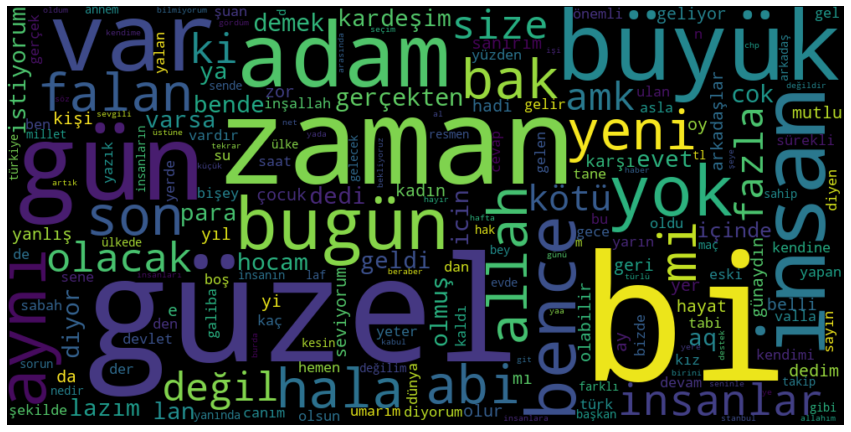

In [ ]:
wordcloud = WordCloud(width=1000, height=500).generate("+".join(dataset['text']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
X = dataset['text']
y = dataset['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
trial = Pipeline([('vect', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf', SGDClassifier()),])
parameters = {
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (None, 5000, 10000, 50000),
 'vect__ngram_range': ((1, 1), (1, 2)), # unigrams or bigrams
 'tfidf__use_idf': (True, False),
 'tfidf__norm': ('l1', 'l2'),
 'clf__max_iter': (20,),
 'clf__alpha': (0.00001, 0.000001),
 'clf__penalty': ('l2', 'elasticnet'),
 'clf__max_iter': (10, 50, 80),
}
grid_search = GridSearchCV(trial, parameters, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
print(best_parameters)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best score: 0.848
Best parameters set:
{'memory': None, 'steps': [('vect', CountVectorizer(max_df=0.75, ngram_range=(1, 2))), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(alpha=1e-05, max_iter=80, penalty='elasticnet'))], 'verbose': False, 'vect': CountVectorizer(max_df=0.75, ngram_range=(1, 2)), 'tfidf': TfidfTransformer(), 'clf': SGDClassifier(alpha=1e-05, max_iter=80, penalty='elasticnet'), 'vect__analyzer': 'word', 'vect__binary': False, 'vect__decode_error': 'strict', 'vect__dtype': <class 'numpy.int64'>, 'vect__encoding': 'utf-8', 'vect__input': 'content', 'vect__lowercase': True, 'vect__max_df': 0.75, 'vect__max_features': None, 'vect__min_df': 1, 'vect__ngram_range': (1, 2), 'vect__preprocessor': None, 'vect__stop_words': None, 'vect__strip_accents': None, 'vect__token_pattern': '(?u)\\b\\w\\w+\\b', 'vect__tokenizer': None, 'vect__vocabulary': None, 'tfidf__norm': 'l2', 'tfidf__smooth_idf': True, 'tfidf__s

In [32]:
best_parameters['steps']

[('vect', CountVectorizer(max_df=0.75, ngram_range=(1, 2))),
 ('tfidf', TfidfTransformer()),
 ('clf', SGDClassifier(alpha=1e-05, max_iter=80, penalty='elasticnet'))]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
trial = Pipeline([(
  'vect', CountVectorizer(max_df=0.75, ngram_range=(1, 2))),
 ('tfidf', TfidfTransformer()),
 ('clf', SGDClassifier(loss='modified_huber',alpha=1e-05, max_iter=80, penalty='elasticnet')),])
trial.fit(X_train, y_train)
print("Accuracy: " + str(trial.score(X_test, y_test)))

Accuracy: 0.8521709556739598


In [38]:
predictions = trial.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(f"{accuracy_score(y_test, predictions)}")
print("****")
print(classification_report(y_test, predictions))
print("****")

[[6785  363]
 [ 941  732]]
0.8521709556739598
****
              precision    recall  f1-score   support

       False       0.88      0.95      0.91      7148
        True       0.67      0.44      0.53      1673

    accuracy                           0.85      8821
   macro avg       0.77      0.69      0.72      8821
weighted avg       0.84      0.85      0.84      8821

****


In [39]:
test = ['berna takÄ±mla iyi anlaÅŸÄ±yor diye linÃ§ yiyor zamanÄ±nda da takÄ±mla iyi anlaÅŸmÄ±yor diye linÃ§ yiyodu kÄ±z linÃ§ yemek iÃ§in doÄŸmuÅŸ amk allah akÄ±l fikir versin size',
 'Yarrak gibi hayat amk',
 'sÄ±rf camia istedi biz de oynattÄ±k demek iÃ§in yapÄ±lmÄ±ÅŸ kadro. Ä°leri uÃ§ta kenan ve gÃ¼ven ile gol arayacaÄŸÄ±z. Åžaka gibi amk.',
 'quoradan Ã§Ä±kamÄ±yorum amk',
 '@buddwifey Bu videoyu her izlediÄŸimde uÃ§uyorum amk HAHAHAHAHAAHHAAHAHSKLDFÄž',
 '@supperbey @uyanhadi_ AldÄ±ÄŸÄ±n asgari Ã¼cret 4k ama amk salaÄŸÄ± seni',
 '@BiraVeVotka Ne yapsak kume dusuyoruz amkðŸ˜‚ yok mu camianin evladi bir sey, bizi bu durumdan kurtarsinðŸ˜‚',
 'on gÃ¼ndÃ¼r maske almayÄ± unutuyorum kullandÄ±ÄŸÄ±m maske rambo okanÄ±n maskesi gibi oldu amk',
 'Biraz daha koysalar kendi tavuk pilavcÄ±mÄ± aÃ§arÄ±m amk https://t.co/DvRA0g5WYm',
 '70 yaÅŸÄ±ndaki bir bunaÄŸa Federasyon koltuÄŸunu emanet edersen olacaÄŸÄ± bu olur amk https://t.co/X8qTQFdPbR']
trial.predict(test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [40]:
import joblib

joblib.dump(trial, 'model2.joblib')

['model2.joblib']